[View in Colaboratory](https://colab.research.google.com/github/UnoYiyi/BAX423/blob/master/443_Homework_2.ipynb)

## Part A: Portfolio Optimization based on the Full Data Set

### 1. Prepare the dataset

#### A. Based on the dataset, compute the rate of returns for each stock, i.e.,

$$r_{it} = \frac{I_{i,t} - I_{i,t-1}}{I_{i,t-1}}$$

where $I_{i,t}$ is the raw data from stock i at time t.


In [6]:
!pip install cvxpy==0.4.11

In [0]:
# import library
import numpy as np
import math
import cvxpy as cvx
from numpy import matrix 
from cvxpy import *
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import scipy

In [14]:
!pip install xlrd

    100% |████████████████████████████████| 112kB 4.5MB/s 


In [15]:
# import dataset
from google.colab import files
files.upload()
df = pd.read_excel("./datahomework2.xls")
df.head()

Saving datahomework2.xls to datahomework2 (4).xls


,Amazon,Apple,Ebay,Facebook,Google,Twitter
0,252.585,106.250000,23.457600,77.190002,519.500000,36.380001
1,245.488,106.260002,23.156700,76.150002,506.600006,37.279999
2,253.816,107.750000,23.116699,76.150002,505.200012,39.090000
3,256.030,111.889999,23.741699,78.175003,506.899994,40.169998
4,253.299,112.010002,23.413401,77.739998,500.700012,39.369999


In [16]:
# calculate the rate of returns for each stock
rr =  df.pct_change()
rr.head()

,Amazon,Apple,Ebay,Facebook,Google,Twitter
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.028097,0.000094,-0.012827,-0.013473,-0.024832,0.024739
2,0.033924,0.014022,-0.001727,0.000000,-0.002764,0.048552
3,0.008723,0.038422,0.027037,0.026592,0.003365,0.027628
4,-0.010667,0.001073,-0.013828,-0.005565,-0.012231,-0.019915





#### B. Based on the data set, compute the average returns that will be used for the optimization, i.e.,

$$\mu_{i} = \displaystyle\sum_{t=1}^T (1+r_{it})^\frac{1}{T} - 1 $$
Hint: the term $\displaystyle\sum_{t=1}^T (1+r_{it})^\frac{1}{T}$ is a geometric mean

In [17]:
# remove the NAN value and add 1 to all values 
rr1 = rr[1:] # rr1 is average returns without NANs
rr2 = rr1 + 1 #rr2 is average returns +1
rr2.head()

,Amazon,Apple,Ebay,Facebook,Google,Twitter
1,0.971903,1.000094,0.987173,0.986527,0.975168,1.024739
2,1.033924,1.014022,0.998273,1.000000,0.997236,1.048552
3,1.008723,1.038422,1.027037,1.026592,1.003365,1.027628
4,0.989333,1.001073,0.986172,0.994435,0.987769,0.980085
5,0.971540,0.975359,0.992274,0.986879,0.992810,1.007112


In [18]:
# calculate the average returns using gmean
mu = scipy.stats.gmean(rr2) -1
mu

array([ 1.98778605e-03,  6.25712685e-04,  7.54726158e-04,  1.08819147e-03,
        9.73603071e-04, -2.78636077e-05])

#### C. Based on the data set, compute the variance-covariance matrix of the stock returns, i.e.,

$$CoVar(r_{i},r_{j}) = \frac{1}{T}\displaystyle\sum_{t=1}^{T} (r_{it}-\bar{r_{it}})(r_{jt} -\bar{r_{jt}})-1$$

Hint: the term $\displaystyle\sum_{t=1}^{T} (r_{it}-\bar{r_{it}})(r_{jt} -\bar{r_{jt}})$ is a geometric mean

In [19]:
# calculate the variance-covariance matrix of the stock returns
Cov = np.cov(rr1, rowvar =False) 
Cov
## If rowvar is True (default), then each row represents a variable, 
## with observations in the columns. Otherwise, the relationship is 
## transposed: each column represents a variable, while the rows 
## contain observations. 

array([[ 4.07197383e-04,  4.60871516e-06,  1.22772826e-05,
        -1.05667569e-05,  6.56723220e-06, -9.50143600e-05],
       [ 4.60871516e-06,  2.10803738e-04,  5.99369392e-05,
         6.94486102e-05,  6.00972703e-05,  4.03675884e-05],
       [ 1.22772826e-05,  5.99369392e-05,  2.92036867e-04,
         2.71083410e-05,  5.45848998e-05,  2.43589545e-05],
       [-1.05667569e-05,  6.94486102e-05,  2.71083410e-05,
         2.42364043e-04,  9.89613223e-05,  2.19275123e-05],
       [ 6.56723220e-06,  6.00972703e-05,  5.45848998e-05,
         9.89613223e-05,  2.02842223e-04,  9.65658924e-06],
       [-9.50143600e-05,  4.03675884e-05,  2.43589545e-05,
         2.19275123e-05,  9.65658924e-06,  1.07122641e-03]])

#### D. Provide the vector $\mu$ and the variance-covariance matrix $\Sigma$ for the 6 assets considered

In [20]:
# the vector mu 
mu

array([ 1.98778605e-03,  6.25712685e-04,  7.54726158e-04,  1.08819147e-03,
        9.73603071e-04, -2.78636077e-05])

In [0]:
mu_matrix = matrix(mu)

In [22]:
# the variance-covariance matrix Sigma
Cov

array([[ 4.07197383e-04,  4.60871516e-06,  1.22772826e-05,
        -1.05667569e-05,  6.56723220e-06, -9.50143600e-05],
       [ 4.60871516e-06,  2.10803738e-04,  5.99369392e-05,
         6.94486102e-05,  6.00972703e-05,  4.03675884e-05],
       [ 1.22772826e-05,  5.99369392e-05,  2.92036867e-04,
         2.71083410e-05,  5.45848998e-05,  2.43589545e-05],
       [-1.05667569e-05,  6.94486102e-05,  2.71083410e-05,
         2.42364043e-04,  9.89613223e-05,  2.19275123e-05],
       [ 6.56723220e-06,  6.00972703e-05,  5.45848998e-05,
         9.89613223e-05,  2.02842223e-04,  9.65658924e-06],
       [-9.50143600e-05,  4.03675884e-05,  2.43589545e-05,
         2.19275123e-05,  9.65658924e-06,  1.07122641e-03]])

### 2. Portfolio Optimization: Minimizing Risk

What is the allocation x = {x1,x2,x3,x4,x5,x6} that solve the following problem

$$Minimize\frac{1}{2}x^{T}\sum x$$

Subject to

$$\mu^{T}x \geq R \\
\displaystyle \sum_{i=1}^{6} x_{i} = 1 \\
x \geq 0$$

where R is the annual return that the investor wants to achieve, with R = 0.07

In [23]:
R=0.07/252 ##there are 252 trading days in a year

x=cvx.Variable(6)

# Solution
# prob = cvs.Problem(objective, C)
# result = prob.solve()
# Prob 1
risk=0.5 * quad_form(x, Cov)
rr=sum_entries(mu*x)
prob1 = Problem(Minimize(risk ), 
               [rr>=R,sum_entries(x) == 1, 
                x >= 0])
prob1.solve()
print(x.value)
x_min = x.value

[[0.2042415 ]
 [0.19551309]
 [0.16170077]
 [0.17376282]
 [0.18986907]
 [0.07491276]]


### 3. Portfolio Optimization: Maximizing Returns (or Utility)

Another approach to portfolio optimization is to optimize the expected returns that the portfolio would give while penalizing for volatility (variance). Specifically, what is the allocation 𝑥 = {𝑥1, 𝑥2, 𝑥3, 𝑥4, 𝑥5, 𝑥6} that solve the following optimization problem

$$ Maximize\mu^{T}x - \gamma \sqrt{(x^{T}\Sigma x)}$$

Subject to 
$$\sum_{i=1}^{6}x_{i} = 1 \\
x \geq 0$$

where $\gamma$ is the risk aversion coefficient of the investor. Report the optimal allocations for $\gamma$ = 0.1, $\gamma$ = 0.15, $\gamma$ = 0.2, as well as the value of the objective function 

#### 3.1 gamma = 0.1

In [0]:
import numpy as np
from scipy.optimize import minimize

In [0]:
##define constraint
## first step - define bounds
bounds = ([0,None],[0,None],[0,None],[0,None],[0,None],[0,None])

In [0]:
## second step - the equality constraint
def con(x):
    return x[0]+x[1]+x[2]+x[3]+x[4]+x[5]-1
cons = {'type':'eq',
        'fun':con}

In [0]:
gamma1 = 0.1
def returnfunc(x):
    return -(x.T * mu_matrix.T-gamma1*np.sqrt(np.dot(np.dot(x.T,Cov),x)))

In [28]:
x0 = np.matrix('0 0 0 0 0 0 ')
print(x0)
x0.shape

[[0 0 0 0 0 0]]


(1, 6)

In [29]:
mu_matrix.T.shape

(6, 1)

In [0]:
res1 = scipy.optimize.minimize(
    returnfunc,
    x0,
    constraints=(
        {'type':'eq','fun':lambda x:x[0]+x[1]+x[2]+x[3]+x[4]+x[5]-1}
    ),
    bounds=((0,None),(0,None),(0,None),(0,None),(0,None),(0,None)),
)

In [31]:
res1.x

array([0.2967567 , 0.15516683, 0.16262145, 0.19664587, 0.18880915,
       0.        ])

#### 3.2 gamma = 0.15

In [0]:
gamma2 = 0.15
def returnfunc(x):
    return -(x.T * mu_matrix.T-gamma2*np.sqrt(np.dot(np.dot(x.T,Cov),x)))

In [33]:
x0 = np.matrix('0 0 0 0 0 0 ')
print(x0)

[[0 0 0 0 0 0]]


In [0]:
res2 = scipy.optimize.minimize(
    returnfunc,
    x0,
    constraints=(
        {'type':'eq','fun':lambda x:x[0]+x[1]+x[2]+x[3]+x[4]+x[5]-1}
    ),
    bounds=((0,None),(0,None),(0,None),(0,None),(0,None),(0,None)),
)

In [35]:
res2.x

array([0.28012906, 0.16293947, 0.16697493, 0.19504473, 0.18995347,
       0.00495833])

#### 3.3 gamma = 0.2

In [0]:
gamma3 = 0.2
def returnfunc(x):
    return -(x.T * mu_matrix.T-gamma3* np.sqrt(np.dot(np.dot(x.T,Cov),x)))

In [37]:
x0 = np.matrix('0 0 0 0 0 0 ')
print(x0)

[[0 0 0 0 0 0]]


In [0]:
res3 = scipy.optimize.minimize(
    returnfunc,
    x0,
    constraints=(
        {'type':'eq','fun':lambda x:x[0]+x[1]+x[2]+x[3]+x[4]+x[5]-1}
    ),
    bounds=((0,None),(0,None),(0,None),(0,None),(0,None),(0,None)),
)

In [39]:
res3.x

array([0.25906249, 0.16776416, 0.16932891, 0.19124837, 0.18827692,
       0.02431914])

### 4. Simulation

Based on the optimal allocations $𝑥^∗$ obtained in the two questions above, 𝜇 and 𝛴, please simulate the value of your portfolio after 300 trading days assuming that you have invested $100,000.
- Report the mean and the variance of the portfolio in a table
- Provide visualizations of your results. 

#### 4.1 Minimizing Risk Simulation

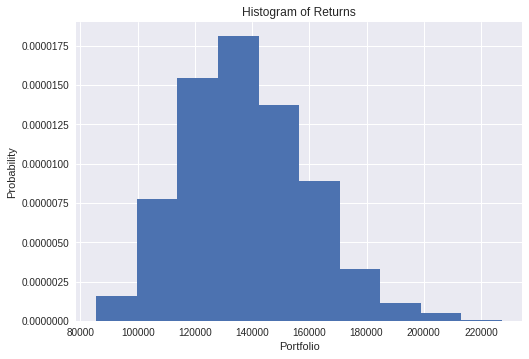

In [40]:
# Simulation
import numpy as np
import matplotlib.pyplot as plt
simu=1000 # I am doing 100 simulations
T = 300 # 300 trading days
m=6 # I have 5 assets
B=100000 # Budget is $100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[x_min.item(0),x_min.item(1),x_min.item(2),x_min.item(3),x_min.item(4),x_min.item(5)]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

plt.hist(z_values, density=True )
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

In [41]:
print(np.mean(z_values))
print(np.var(z_values))

137925.98955588514
474573263.756741


#### 4.2.1 Maximizing Return (Utility) - gamma = 0.10

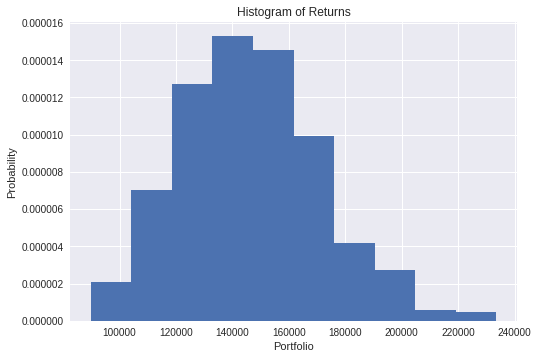

In [42]:
# Simulation
import numpy as np
import matplotlib.pyplot as plt
simu=1000 # I am doing 1000 simulations
T = 300 # 300 trading days
m=6 # I have 5 assets
B=100000 # Budget is $100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[res1.x.item(0),res1.x.item(1),res1.x.item(2),res1.x.item(3),res1.x.item(4),res1.x.item(5)]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

plt.hist(z_values, density=True )
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

In [43]:
import math
print(np.mean(z_values))
print(np.var(z_values))

146441.93673523405
611241533.1734049


#### 4.2.2 Maximizing Return (Utility) - gamma = 0.15

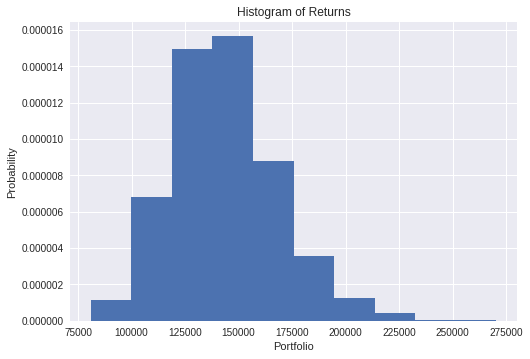

In [44]:
# Simulation
import numpy as np
import matplotlib.pyplot as plt
simu=1000 # I am doing 1000 simulations
T = 300 # 300 trading days
m=6 # I have 5 assets
B=100000 # Budget is $100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[res2.x.item(0),res2.x.item(1),res2.x.item(2),res2.x.item(3),res2.x.item(4),res2.x.item(5)]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

plt.hist(z_values, density=True )
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

In [45]:
import math
print(np.mean(z_values))
print(np.var(z_values))

143910.604790161
625811736.4795579


#### 4.2.3 Maximizing Return (Utility) - gamma = 0.20

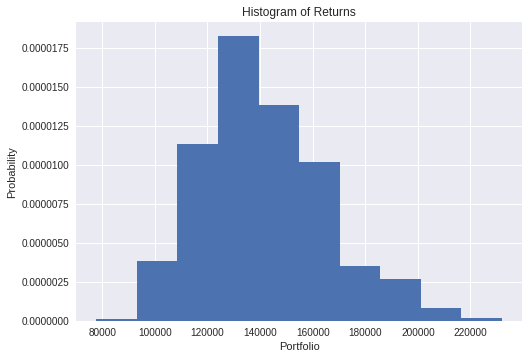

In [46]:
# Simulation
import numpy as np
import matplotlib.pyplot as plt
simu=1000 # I am doing 1000 simulations
T = 300 # 300 trading days
m=6 # I have 5 assets
B=100000 # Budget is $100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[res3.x.item(0),res3.x.item(1),res3.x.item(2),res3.x.item(3),res3.x.item(4),res3.x.item(5)]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

plt.hist(z_values, density=True )
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

In [47]:
import math
print(np.mean(z_values))
print(np.var(z_values))

141484.77934762
572204309.3970996


#### 4.3. Reporting Result

||Minimizing Risk|Maximize Utility (gamma = 0.1)|Maximize Utility (gamma = 0.15)|Maximize Utility (gamma = 0.2)
|-|-|-
|Mean|a|b|c|d
|Variance|a|b|c|d

### 5. Recommendations
- a. Explain the different allocations, i.e., why they are different.
- b. What should an investor with risk aversion $\gamma$ = 0.1 do? What about investors with
$\gamma$ = 0.15 and $\gamma$ = 0.2?

## Part B: Portfolio Optimization based on the last 400 trading days

Redo Part A taking into account the last 400 trading days only.

In [48]:
df_2 = df.iloc[-400:]
df_2.shape

(400, 6)

### 1. Prepare the dataset

#### A. Based on the dataset, compute the rate of returns for each stock, i.e.,

$$r_{it} = \frac{I_{i,t} - I_{i,t-1}}{I_{i,t-1}}$$

where $I_{i,t}$ is the raw data from stock i at time t.


In [49]:
# calculate the rate of returns for each stock
rr_2 =  df_2.pct_change()
rr_2.head()

,Amazon,Apple,Ebay,Facebook,Google,Twitter
399,NaN,NaN,NaN,NaN,NaN,NaN
400,-0.015032,0.015207,0.010625,0.006353,0.012142,0.067554
401,-0.002854,0.008281,-0.007646,0.000879,-0.002107,-0.022052
402,0.015332,0.004060,-0.001284,-0.001597,0.002794,-0.011274
403,0.008462,-0.007444,0.000321,-0.001439,0.001251,-0.058007





#### B. Based on the data set, compute the average returns that will be used for the optimization, i.e.,

$$\mu_{i} = \displaystyle\sum_{t=1}^T (1+r_{it})^\frac{1}{T} - 1 $$
Hint: the term $\displaystyle\sum_{t=1}^T (1+r_{it})^\frac{1}{T}$ is a geometric mean

In [50]:
# remove the NAN value and add 1 to all values 
rr1_2 = rr_2[1:] # rr1 is average returns without NANs
rr2_2 = rr1_2 + 1 #rr2 is average returns +1
rr2_2.head()

,Amazon,Apple,Ebay,Facebook,Google,Twitter
400,0.984968,1.015207,1.010625,1.006353,1.012142,1.067554
401,0.997146,1.008281,0.992354,1.000879,0.997893,0.977948
402,1.015332,1.004060,0.998716,0.998403,1.002794,0.988726
403,1.008462,0.992556,1.000321,0.998561,1.001251,0.941993
404,0.999318,0.999352,1.002571,1.000160,0.999641,0.998947


In [51]:
# calculate the average returns using gmean
mu_2 = scipy.stats.gmean(rr2_2) -1
mu_2

array([0.0014643 , 0.00126081, 0.00080563, 0.00098042, 0.0008732 ,
       0.00150318])

#### C. Based on the data set, compute the variance-covariance matrix of the stock returns, i.e.,

$$CoVar(r_{i},r_{j}) = \frac{1}{T}\displaystyle\sum_{t=1}^{T} (r_{it}-\bar{r_{it}})(r_{jt} -\bar{r_{jt}})-1$$

Hint: the term $\displaystyle\sum_{t=1}^{T} (r_{it}-\bar{r_{it}})(r_{jt} -\bar{r_{jt}})$ is a geometric mean

In [52]:
# calculate the variance-covariance matrix of the stock returns
Cov_2 = np.cov(rr1_2, rowvar =False) 
Cov_2
## If rowvar is True (default), then each row represents a variable, 
## with observations in the columns. Otherwise, the relationship is 
## transposed: each column represents a variable, while the rows 
## contain observations. 

array([[ 2.30088874e-04, -9.80656083e-06, -3.67118033e-07,
        -2.03091049e-06, -9.31662594e-07, -3.37324041e-05],
       [-9.80656083e-06,  1.39717164e-04,  6.59845214e-06,
         2.84381359e-06,  6.91391549e-06, -1.06771505e-05],
       [-3.67118033e-07,  6.59845214e-06,  2.36747967e-04,
        -1.32110055e-05,  1.87955968e-06, -2.61970380e-05],
       [-2.03091049e-06,  2.84381359e-06, -1.32110055e-05,
         1.58565058e-04,  2.13809934e-05, -2.33631945e-06],
       [-9.31662594e-07,  6.91391549e-06,  1.87955968e-06,
         2.13809934e-05,  1.22494482e-04, -5.32303550e-06],
       [-3.37324041e-05, -1.06771505e-05, -2.61970380e-05,
        -2.33631945e-06, -5.32303550e-06,  1.00392215e-03]])

#### D. Provide the vector $\mu$ and the variance-covariance matrix $\Sigma$ for the 6 assets considered

In [53]:
# the vector mu 
mu_2

array([0.0014643 , 0.00126081, 0.00080563, 0.00098042, 0.0008732 ,
       0.00150318])

In [0]:
mu_matrix = matrix(mu_2)

In [0]:
# the variance-covariance matrix Sigma
Cov = Cov_2

### 2. Portfolio Optimization: Minimizing Risk

What is the allocation x = {x1,x2,x3,x4,x5,x6} that solve the following problem

$$Minimize\frac{1}{2}x^{T}\sum x$$

Subject to

$$\mu^{T}x \geq R \\
\displaystyle \sum_{i=1}^{6} x_{i} = 1 \\
x \geq 0$$

where R is the annual return that the investor wants to achieve, with R = 0.07

In [56]:
R=0.07/252 ##there are 252 trading days in a year

x=cvx.Variable(6)

# Solution
# prob = cvs.Problem(objective, C)
# result = prob.solve()
# Prob 1
risk=0.5 *quad_form(x, Cov_2)
rr=sum_entries(mu_2*x)
prob1 = Problem(Minimize(risk), 
               [rr>=R,sum_entries(x) == 1, 
                x >= 0])
prob1.solve()
print(x.value)

[[0.16299763]
 [0.22953546]
 [0.14733569]
 [0.18900744]
 [0.22479685]
 [0.04632693]]


### 3. Portfolio Optimization: Maximizing Returns (or Utility)

Another approach to portfolio optimization is to optimize the expected returns that the portfolio would give while penalizing for volatility (variance). Specifically, what is the allocation 𝑥 = {𝑥1, 𝑥2, 𝑥3, 𝑥4, 𝑥5, 𝑥6} that solve the following optimization problem

$$ Maximize\mu^{T}x - \gamma \sqrt{(x^{T}\Sigma x)}$$

Subject to 
$$\sum_{i=1}^{6}x_{i} = 1 \\
x \geq 0$$

where $\gamma$ is the risk aversion coefficient of the investor. Report the optimal allocations for $\gamma$ = 0.1, $\gamma$ = 0.15, $\gamma$ = 0.2, as well as the value of the objective function 

#### 3.1 gamma = 0.1

In [0]:
import numpy as np
from scipy.optimize import minimize

In [0]:
gamma1 = 0.1
def returnfunc(x):
    return -(x.T * mu_matrix.T-gamma1*np.sqrt(np.dot(np.dot(x.T,Cov),x)))

In [59]:
x0 = np.matrix('0 0 0 0 0 0 ')
print(x0)
x0.shape

[[0 0 0 0 0 0]]


(1, 6)

In [60]:
mu_matrix.T.shape

(6, 1)

In [0]:
res1 = scipy.optimize.minimize(
    returnfunc,
    x0,
    constraints=(
        {'type':'eq','fun':lambda x:x[0]+x[1]+x[2]+x[3]+x[4]+x[5]-1}
    ),
    bounds=((0,None),(0,None),(0,None),(0,None),(0,None),(0,None)),
)

In [62]:
res1.x

array([0.21998636, 0.21232513, 0.15322577, 0.17908012, 0.17333022,
       0.06205241])

#### 3.2 gamma = 0.15

In [0]:
gamma2 = 0.15
def returnfunc(x):
    return -(x.T * mu_matrix.T-gamma2*np.sqrt(np.dot(np.dot(x.T,Cov),x)))

In [64]:
x0 = np.matrix('0 0 0 0 0 0 ')
print(x0)

[[0 0 0 0 0 0]]


In [0]:
res2 = scipy.optimize.minimize(
    returnfunc,
    x0,
    constraints=(
        {'type':'eq','fun':lambda x:x[0]+x[1]+x[2]+x[3]+x[4]+x[5]-1}
    ),
    bounds=((0,None),(0,None),(0,None),(0,None),(0,None),(0,None)),
)

In [66]:
res2.x

array([0.20717139, 0.20630262, 0.16345486, 0.18306271, 0.18090267,
       0.05910575])

#### 3.3 gamma = 0.2

In [0]:
gamma3 = 0.2
def returnfunc(x):
    return -(x.T * mu_matrix.T-gamma3* np.sqrt(np.dot(np.dot(x.T,Cov),x)))

In [68]:
x0 = np.matrix('0 0 0 0 0 0 ')
print(x0)

[[0 0 0 0 0 0]]


In [0]:
res3 = scipy.optimize.minimize(
    returnfunc,
    x0,
    constraints=(
        {'type':'eq','fun':lambda x:x[0]+x[1]+x[2]+x[3]+x[4]+x[5]-1}
    ),
    bounds=((0,None),(0,None),(0,None),(0,None),(0,None),(0,None)),
)

In [70]:
res3.x

array([0.20166682, 0.20413569, 0.16790651, 0.18510503, 0.184638  ,
       0.05654795])

### 4. Simulation

Based on the optimal allocations $𝑥^∗$ obtained in the two questions above, 𝜇 and 𝛴, please simulate the value of your portfolio after 300 trading days assuming that you have invested $100,000.
- Report the mean and the variance of the portfolio in a table
- Provide visualizations of your results. 

#### 4.1 Minimizing Risk Simulation

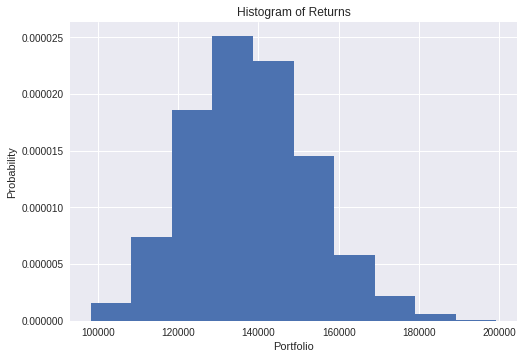

In [71]:
# Simulation
import numpy as np
import matplotlib.pyplot as plt
simu=1000 # I am doing 100 simulations
T = 300 # 300 trading days
m=6 # I have 5 assets
B=100000 # Budget is $100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[x_min.item(0),x_min.item(1),x_min.item(2),x_min.item(3),x_min.item(4),x_min.item(5)]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

plt.hist(z_values, density=True )
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

In [72]:
print(np.mean(z_values))
print(np.var(z_values))

138031.80265727424
231290153.19812763


#### 4.2.1 Maximizing Return (Utility) - gamma = 0.10

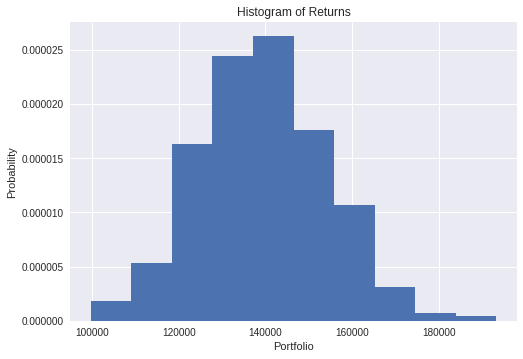

In [73]:
# Simulation
import numpy as np
import matplotlib.pyplot as plt
simu=1000 # I am doing 1000 simulations
T = 300 # 300 trading days
m=6 # I have 5 assets
B=100000 # Budget is $100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[res1.x.item(0),res1.x.item(1),res1.x.item(2),res1.x.item(3),res1.x.item(4),res1.x.item(5)]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

plt.hist(z_values, density=True )
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

In [74]:
import math
print(np.mean(z_values))
print(np.var(z_values))

139327.81196167693
218383877.7232379


#### 4.2.2 Maximizing Return (Utility) - gamma = 0.15

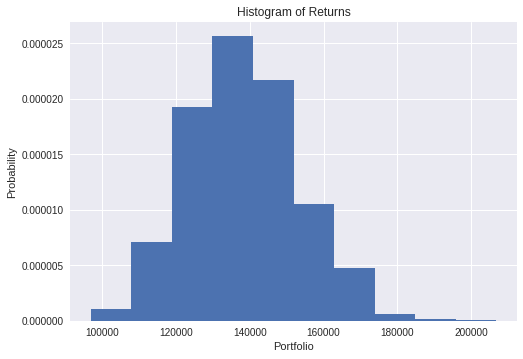

In [75]:
# Simulation
import numpy as np
import matplotlib.pyplot as plt
simu=1000 # I am doing 1000 simulations
T = 300 # 300 trading days
m=6 # I have 5 assets
B=100000 # Budget is $100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[res2.x.item(0),res2.x.item(1),res2.x.item(2),res2.x.item(3),res2.x.item(4),res2.x.item(5)]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

plt.hist(z_values, density=True )
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

In [76]:
import math
print(np.mean(z_values))
print(np.var(z_values))

138380.26969839673
224702533.41235456


#### 4.2.3 Maximizing Return (Utility) - gamma = 0.20

In [0]:
# Simulation
import numpy as np
import matplotlib.pyplot as plt
simu=1000 # I am doing 1000 simulations
T = 300 # 300 trading days
m=6 # I have 5 assets
B=100000 # Budget is $100000
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[res3.x.item(0),res3.x.item(1),res3.x.item(2),res3.x.item(3),res3.x.item(4),res3.x.item(5)]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

plt.hist(z_values, density=True )
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

In [0]:
import math
print(np.mean(z_values))
print(np.var(z_values))

142137.03443082268
566985391.5576904


#### 4.3. Reporting Result

||Minimizing Risk|Maximize Utility (gamma = 0.1)|Maximize Utility (gamma = 0.15)|Maximize Utility (gamma = 0.2)
|-|-|-
|Mean|a|b|c|d
|Variance|a|b|c|d

### 5. Recommendations
- a. Explain the different allocations, i.e., why they are different.
- b. What should an investor with risk aversion $\gamma$ = 0.1 do? What about investors with
$\gamma$ = 0.15 and $\gamma$ = 0.2?
- c. Why are the allocations different?